

----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [542]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [543]:

import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [544]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

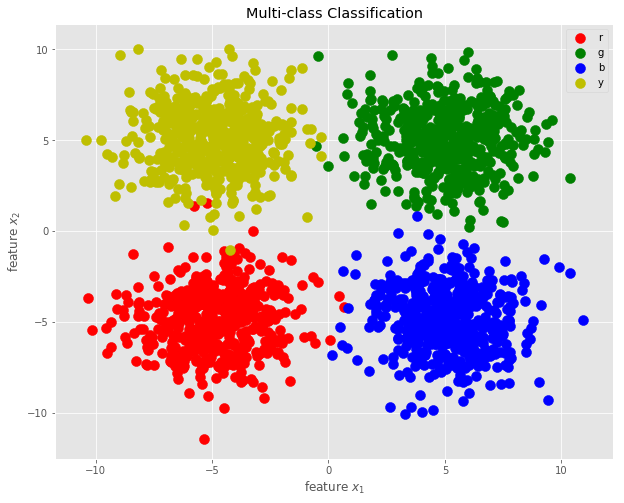

In [545]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [546]:
import randomForest as rf

In [547]:
rfc=rf.RandomForest(weaklearner='Linear')

In [548]:
print X.shape, Y.shape


(2000, 2) (2000, 1)


In [549]:
print X.shape
rfc.train(X,Y)

(2000, 2)
here we will train trees
Creating Left Child Node With 1085 Examples, and Right Node with  915 Examples
Creating Left Child Node With 598 Examples, and Right Node with  487 Examples
C(class= 3.0 ,Purity= 0.8043478260869565 )
C(class= 2.0 ,Purity= 0.9609856262833676 )
Creating Left Child Node With 518 Examples, and Right Node with  397 Examples
Creating Left Child Node With 163 Examples, and Right Node with  355 Examples
C(class= 4.0 ,Purity= 0.803680981595092 )
C(class= 1.0 ,Purity= 0.9943661971830986 )
C(class= 4.0 ,Purity= 0.924433249370277 )
Creating Left Child Node With 1163 Examples, and Right Node with  837 Examples
Creating Left Child Node With 672 Examples, and Right Node with  491 Examples
Creating Left Child Node With 496 Examples, and Right Node with  176 Examples
C(class= 2.0 ,Purity= 0.9959677419354839 )
C(class= 4.0 ,Purity= 0.9886363636363636 )
C(class= 3.0 ,Purity= 0.9918533604887984 )
Creating Left Child Node With 187 Examples, and Right Node with  650 Exampl

In [550]:
len(rfc.trees)

10

In [551]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,495,0,2,3,500
2.0,0,492,1,7,500
3.0,2,2,496,0,500
4.0,1,0,0,499,500
All,498,494,499,509,2000


In [552]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

In [553]:
print acc

500.0


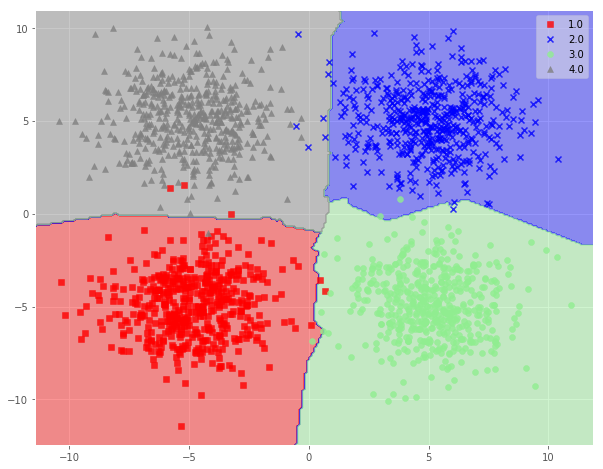

In [554]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [555]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,249,0,0,1,250
2.0,0,246,1,3,250
3.0,2,1,247,0,250
4.0,1,0,0,249,250
All,252,247,248,253,1000


In [556]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

In [557]:
print acc

250.0


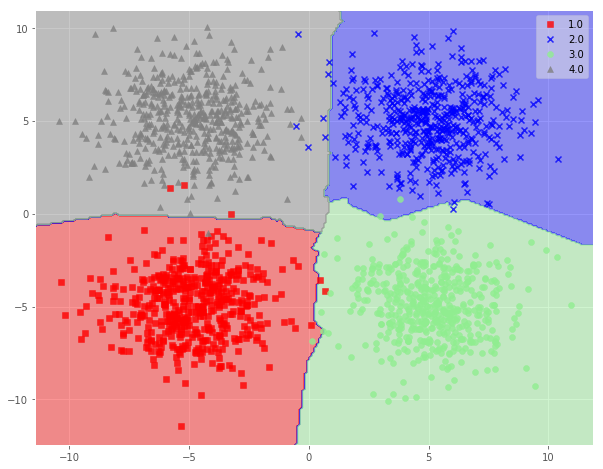

In [558]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


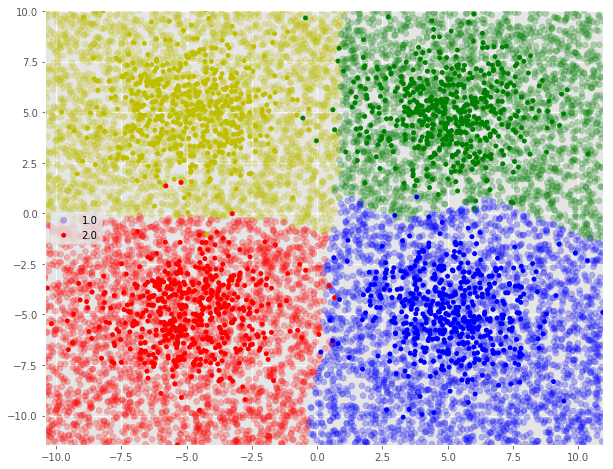

In [559]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

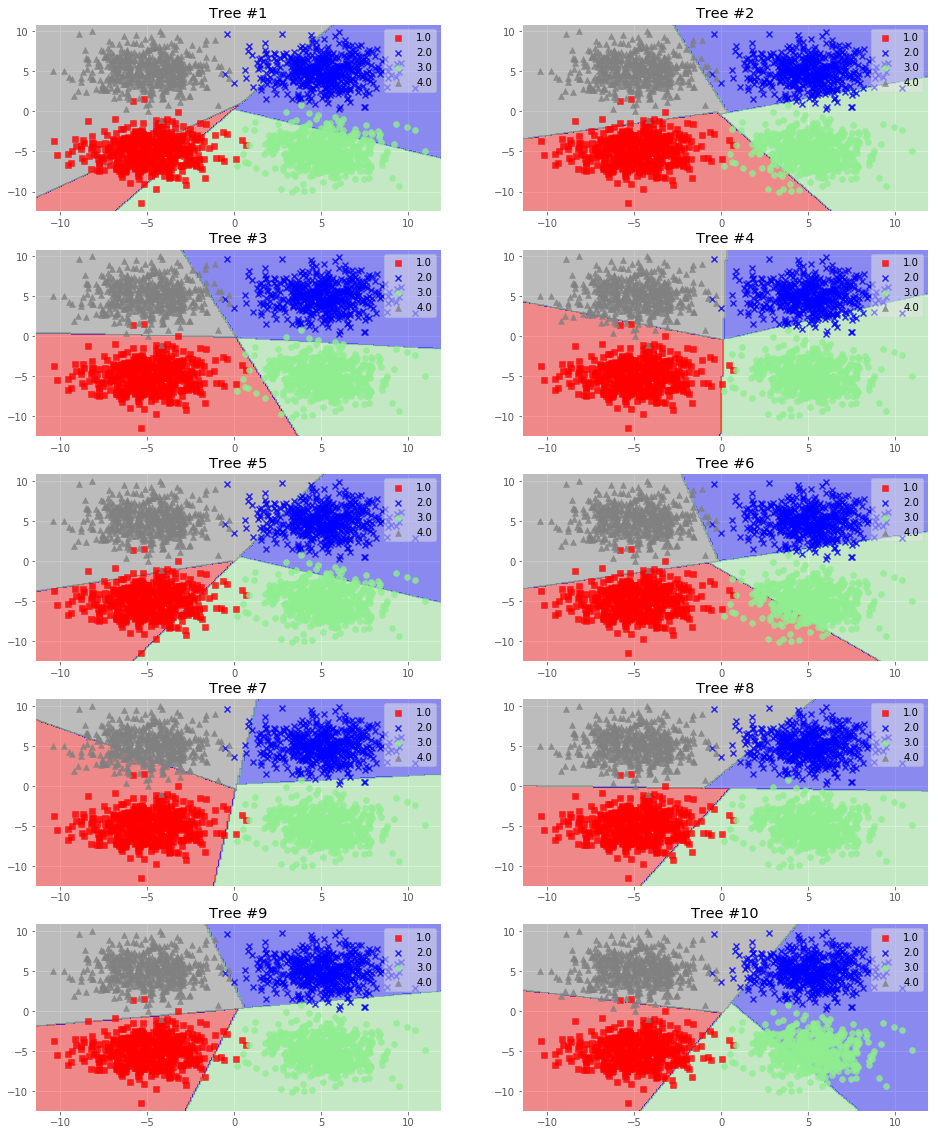

In [560]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

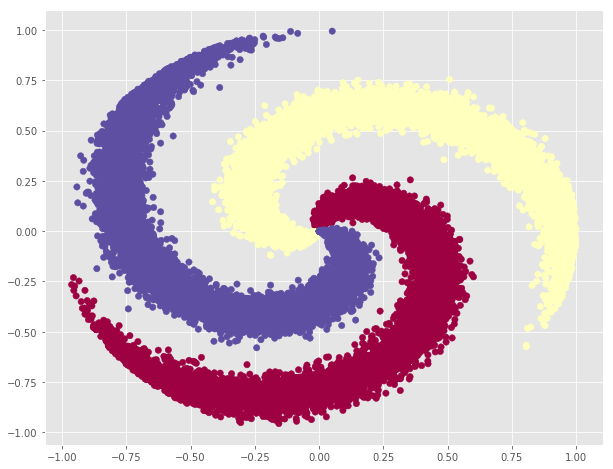

In [561]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [562]:
print X.shape, Y.shape

(30000, 2) (30000,)


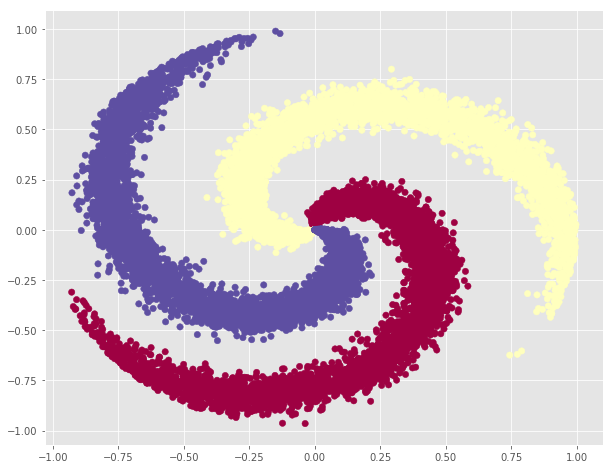

In [563]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [564]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y)

here we will train trees
Creating Left Child Node With 10468 Examples, and Right Node with  19532 Examples
Creating Left Child Node With 8808 Examples, and Right Node with  1660 Examples
Creating Left Child Node With 3769 Examples, and Right Node with  5039 Examples
C(class= 1.0 ,Purity= 0.9957548421331919 )
C(class= 0.0 ,Purity= 0.9668585036713634 )
C(class= 1.0 ,Purity= 0.9 )
Creating Left Child Node With 12730 Examples, and Right Node with  6802 Examples
Creating Left Child Node With 5499 Examples, and Right Node with  7231 Examples
C(class= 2.0 ,Purity= 0.8401527550463721 )
Creating Left Child Node With 4121 Examples, and Right Node with  3110 Examples
C(class= 1.0 ,Purity= 0.9131278815821403 )
Creating Left Child Node With 1187 Examples, and Right Node with  1923 Examples
C(class= 1.0 ,Purity= 0.6722830665543387 )
C(class= 0.0 ,Purity= 0.5085803432137286 )
Creating Left Child Node With 3850 Examples, and Right Node with  2952 Examples
C(class= 0.0 ,Purity= 0.8498701298701299 )
C(c

Creating Left Child Node With 16708 Examples, and Right Node with  5633 Examples
Creating Left Child Node With 2273 Examples, and Right Node with  14435 Examples
C(class= 0.0 ,Purity= 0.9401671799384074 )
Creating Left Child Node With 9074 Examples, and Right Node with  5361 Examples
Creating Left Child Node With 6635 Examples, and Right Node with  2439 Examples
C(class= 1.0 ,Purity= 0.48786737000753577 )
C(class= 2.0 ,Purity= 1.0 )
Creating Left Child Node With 1959 Examples, and Right Node with  3402 Examples
C(class= 2.0 ,Purity= 0.6799387442572741 )
C(class= 0.0 ,Purity= 0.6819517930629042 )
C(class= 0.0 ,Purity= 0.812710811290609 )
Creating Left Child Node With 3968 Examples, and Right Node with  3691 Examples
Creating Left Child Node With 598 Examples, and Right Node with  3370 Examples
C(class= 2.0 ,Purity= 1.0 )
Creating Left Child Node With 1675 Examples, and Right Node with  1695 Examples
C(class= 2.0 ,Purity= 0.8334328358208956 )
C(class= 1.0 ,Purity= 1.0 )
C(class= 1.0 ,Pur

Creating Left Child Node With 8281 Examples, and Right Node with  21719 Examples
Creating Left Child Node With 6429 Examples, and Right Node with  1852 Examples
C(class= 2.0 ,Purity= 0.7851920983045575 )
C(class= 0.0 ,Purity= 1.0 )
Creating Left Child Node With 17684 Examples, and Right Node with  4035 Examples
Creating Left Child Node With 5410 Examples, and Right Node with  12274 Examples
Creating Left Child Node With 3488 Examples, and Right Node with  1922 Examples
Creating Left Child Node With 1362 Examples, and Right Node with  2126 Examples
C(class= 2.0 ,Purity= 0.9170337738619677 )
C(class= 1.0 ,Purity= 1.0 )
C(class= 1.0 ,Purity= 1.0 )
Creating Left Child Node With 11978 Examples, and Right Node with  296 Examples
Creating Left Child Node With 2947 Examples, and Right Node with  9031 Examples
C(class= 0.0 ,Purity= 0.9480827960637936 )
C(class= 0.0 ,Purity= 0.438489646772229 )
C(class= 1.0 ,Purity= 0.956081081081081 )
C(class= 1.0 ,Purity= 0.9633209417596035 )
Creating Left Chi

In [567]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,9358,1,641,10000
1,166,9158,676,10000
2,15,345,9640,10000
All,9539,9504,10957,30000


In [566]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,4699,0,301,5000
1,91,4579,330,5000
2,6,161,4833,5000
All,4796,4740,5464,15000


In [568]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


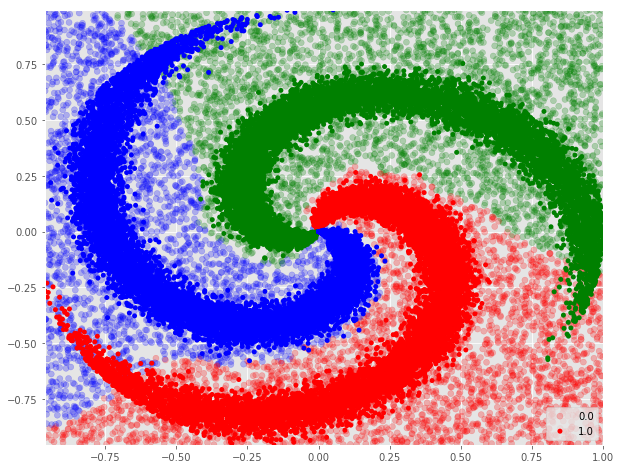

In [569]:
t.plot_points_range(rfc,X,Y)

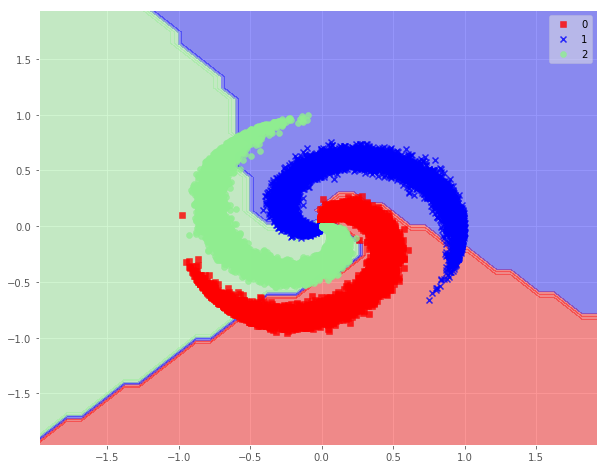

In [532]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

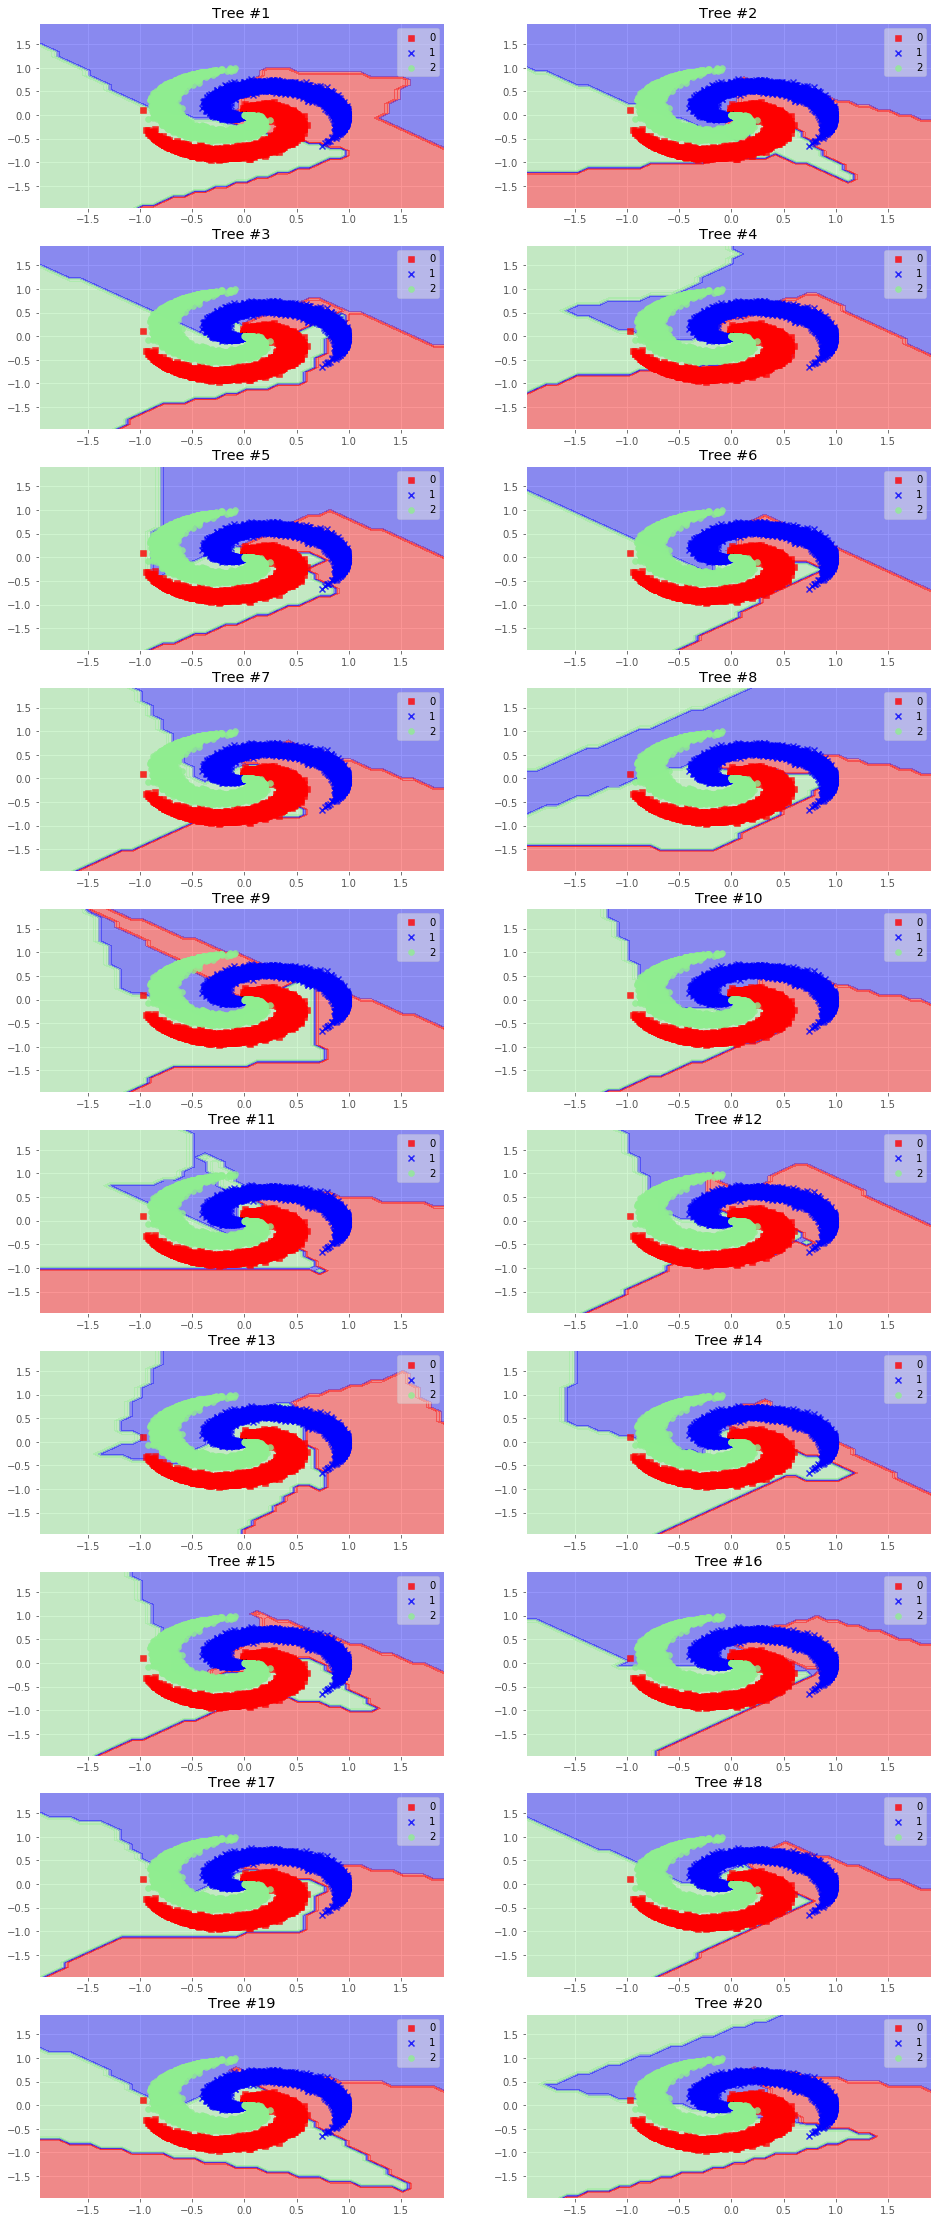

In [533]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

In [541]:
arr=np.array([[1],[2]])
arr2=np.array([1])


[[ True]
 [False]]


## TODO: Find Optimal Number of Trees for this data set, using cross validation...

(30000, 2) (30000,)
here we will train trees


ValueError: could not broadcast input array from shape (30000,1) into shape (30000)

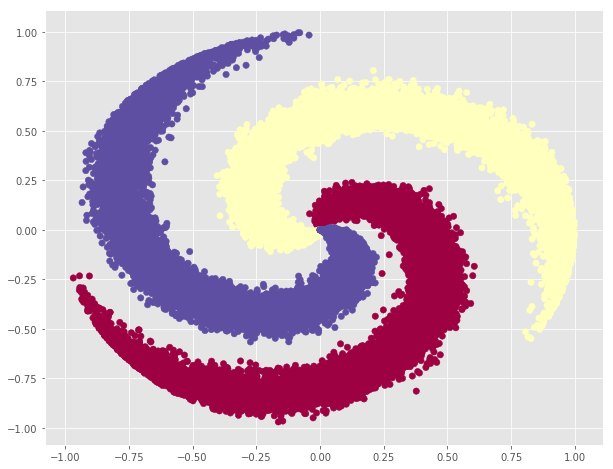

In [534]:
X,Y=t.get_spherical_data(N=10000)
print X.shape, Y.shape
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)

for tree in trees:
    rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print "Trees=", tree, " and Accuracy=", acc